# 1. Loading & Cleaning Data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [7]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [12]:
df['neighbourhood'].unique().shape

(221,)

There are 48895 rental units in the dataset

converting object type to datetime type

In [4]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

one hot encoding for room type

In [136]:
df = pd.merge(df,pd.get_dummies(df['room_type']),left_index=True, right_index=True)
df.drop(['room_type'],axis=1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,False,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150,3,0,NaT,NaN,1,365,False,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,True,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,NaT,NaN,2,9,False,True,False
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,40,4,0,NaT,NaN,2,36,False,True,False
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,115,10,0,NaT,NaN,1,27,True,False,False
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,55,1,0,NaT,NaN,6,2,False,False,True


# 2 Exploratory Data Analysis

2.1 Neighborhood Group Analysis

In [5]:
neighbourhood_group = df['neighbourhood_group'].value_counts().index.to_list()
neighbourhood_group_counts = df['neighbourhood_group'].value_counts().to_list()
import matplotlib.pyplot as plt
plt.bar(neighborhood_groups,neighbourhood_group_counts,color='maroon',width=0.4)
plt.xlabel("NYC Neighbourhood Groups")
plt.ylabel("No. of Airbnb Rentals")
plt.title("Airbnb Rental Properties by Neighbourhood Group")
plt.show()

NameError: name 'neighborhood_groups' is not defined

2.1 Neighborhood Analysis

In [84]:
import folium
from folium.plugins import FastMarkerCluster
latsnyc = df['latitude'].tolist()
lonsnyc = df['longitude'].tolist()
pricenyc = df['price'].tolist()
locations = list(zip(latsnyc, lonsnyc))
map1 = folium.Map(location=[40.7128, -74.0060], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1


There are 221 distinct Neighborhoods in NYC

In [91]:
neighbourhood_data = df['neighbourhood'].value_counts().to_frame().reset_index()
neighbourhood_data.max()

neighbourhood    Woodside
count                3920
dtype: object

The neighborhood with the most rentals is Woodside with 3920 rentals. The mean is 221 rental units. Q1 is 10, Q2 is 32 and Q3 is 154.

Looking at the greater than outliers 

In [118]:

upper_range = Q3+(1.5*IQR)
neighboorhood_count_outliers_df = neighbourhood_data.loc[neighbourhood_data['count']>upper_range]
print(neighboorhood_count_outliers_df['count'].sum())
print(neighboorhood_count_outliers_df.shape[0])



37359
31


In [120]:
neighboorhood_count_outliers_df

,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


76% of total Airbnbs in NYC are conentrated in 14% of the neighborhoods.

# 3 Price Analysis

removing outliers

In [150]:
pq3 = np.quantile(df['price'], 0.75)
pq1 = np.quantile(df ['price'], 0.25)
pIQR = pq3 - pq1
pupper_range = pq3+(1.5*pIQR)
plower_range = pq1 - (1.5*pIQR)
df3 = df.drop(df.index[(df['price']>pupper_range)|(df['price']<plower_range)].tolist())

In [154]:
df4 = df['room_type'].value_counts().to_frame().reset_index()
df4['percent'] = df4['count']/df4['count'].sum()

In [164]:
testdf = df[['price','room_type']].groupby("room_type").mean().reset_index()

In [167]:
type_df = df4.merge(testdf,how='inner',left_on='room_type',right_on="room_type")
type_df

,room_type,count,percent,price
0,Entire home/apt,25409,0.519665,211.794246
1,Private room,22326,0.456611,89.780973
2,Shared room,1160,0.023724,70.127586


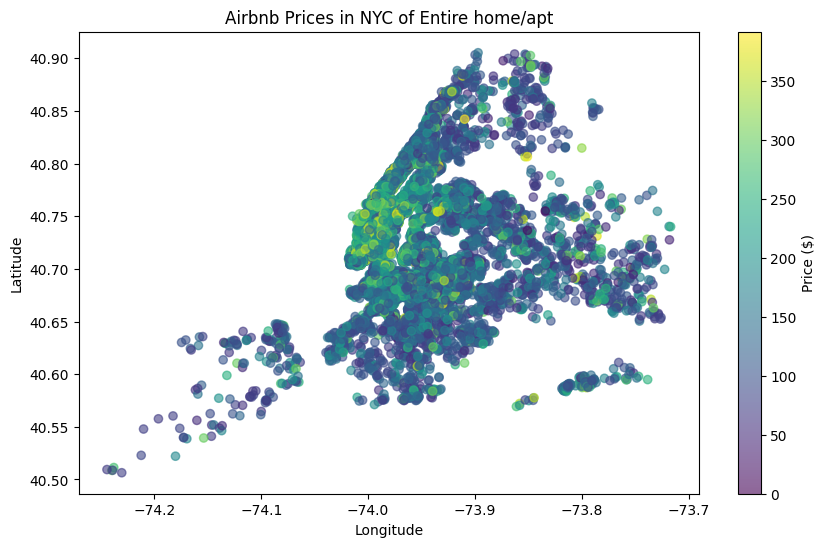

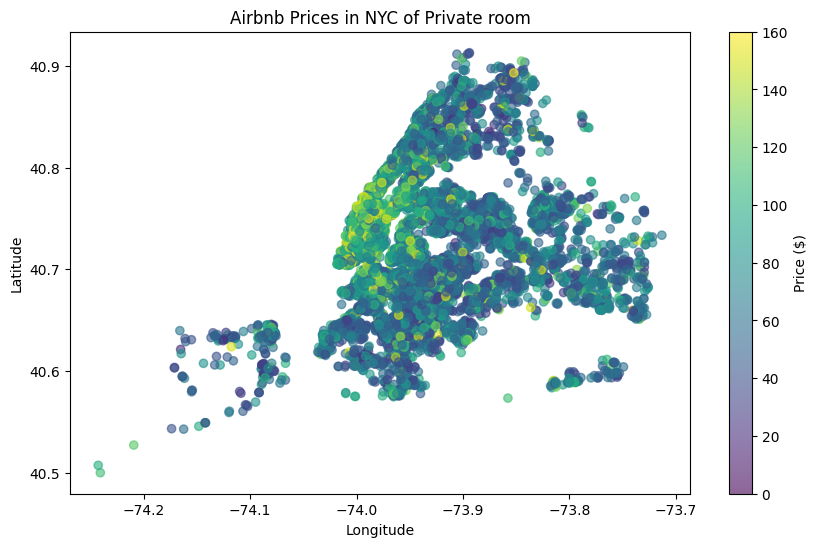

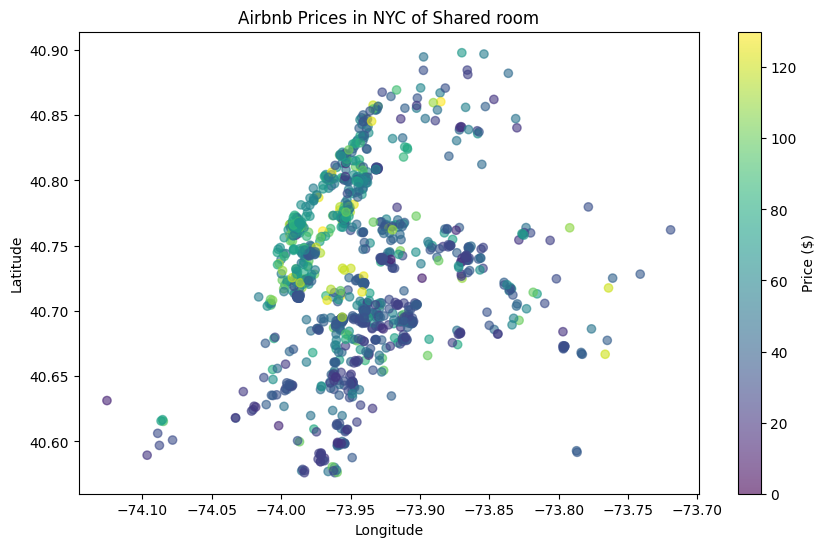

In [170]:
def graph_room_type(room_type):
    df5 = df.drop(df.index[df['room_type']!= room_type].tolist())
    pq3 = np.quantile(df5['price'], 0.75)
    pq1 = np.quantile(df5['price'], 0.25)
    pIQR = pq3 - pq1
    pupper_range = pq3+(1.5*pIQR)
    plower_range = pq1 - (1.5*pIQR)
    df6 =  df5.drop(df5.index[(df5['price']>pupper_range)|(df5['price']<plower_range)].tolist())
    latsnyc = df6['latitude'].tolist()
    lonsnyc = df6['longitude'].tolist()
    pricenyc = df6['price'].tolist()
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(lonsnyc, latsnyc, c= pricenyc, cmap='viridis', alpha=0.6)
    cbar = plt.colorbar(scatter)
    cbar.set_label('Price ($)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Airbnb Prices in NYC of ' + room_type)
    plt.show()

for i in type_df.index:
    graph_room_type(type_df['room_type'][i])

In [173]:
print(df['price'].mean(), df[df['neighbourhood']=='Chelsea']['price'].mean())

152.7206871868289 249.73854447439354


# Host Analysis

In [174]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
df_host = df[['id','host_id']].groupby('host_id').count().reset_index()
no_rentals_owned = df_host['id'].value_counts().to_frame().reset_index().sort_values('id')
df[df['host_id'].isin(df_host[df_host['id']>20]['host_id'].to_list())]['minimum_nights'].describe().to_frame().reset_index()
#df[(df['host_id']==219517861)|(df['host_id']==107434423)|(df['host_id']==30283594)|(df['host_id']==16098958)]

,index,minimum_nights
0,count,2205.000000
1,mean,25.431293
2,std,13.241352
3,min,1.000000
4,25%,29.000000
5,50%,30.000000
6,75%,30.000000
7,max,180.000000


In [15]:
no_rentals_owned

,id,count
0,1,32303
1,2,3329
2,3,951
3,4,360
4,5,169
5,6,95
6,7,57
7,8,52
8,9,26
9,10,21
